## <a id='toc1_'></a>[Inaugural Project](#toc0_)



Import the needed packages.

In [1]:
from types import SimpleNamespace
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import statsmodels.api as sm
import pandas as pd
%load_ext autoreload
%autoreload 2

import HouseholdSpecializationModel
from HouseholdSpecializationModel import HouseholdSpecializationModelClass
model=HouseholdSpecializationModelClass()

*****

## <a id='toc1_'></a>[Question 1](#toc0_)

Task: Illustrate how HF/HM changes when varying α = {0.25, 0.5, 0.75}  and  σ = {0.5, 1.0, 1.5}


The code below is used for creating a table with the ratio of HF/HM for varying values of α & σ


In [2]:
%%capture
# Table
from tabulate import tabulate

model = HouseholdSpecializationModelClass()

alpha_vals = [0.25, 0.5, 0.75]
sigma_vals = [0.5, 1.0, 1.5]

results_df = pd.DataFrame(columns=['alpha', 'sigma'])

for alpha in alpha_vals:
    for sigma in sigma_vals:
        model.par.alpha = alpha 
        model.par.sigma = sigma 

        opt = model.solve_discrete()
        resultat = opt.HF / opt.HM

        results_df = results_df.append({'alpha': alpha, 'sigma': sigma, 'Ratio HF/HM': resultat}, ignore_index=True)

matrix = results_df.pivot(index='alpha', columns='sigma', values='Ratio HF/HM')

In [3]:
# Print the results
df=pd.DataFrame(matrix)
df.style

sigma,0.500000,1.000000,1.500000
alpha,,,
0.250000,0.545455,0.307692,0.214286
0.500000,1.000000,1.000000,1.000000
0.750000,1.833333,3.250000,4.666667


The code below is used to create a figure of the results from the table above.

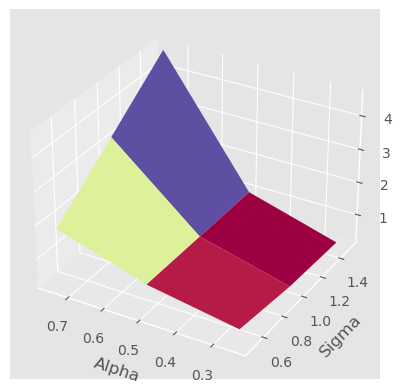

In [4]:
# Figure 

# import plot modules
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm # for colormaps

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = results_df['alpha']
y = results_df['sigma']
z = results_df['Ratio HF/HM']

X, Y = np.meshgrid(np.unique(x), np.unique(y),indexing='ij')
Z = z.values.reshape(len(np.unique(y)), len(np.unique(x)))

autumn_cmap = cm.get_cmap('Spectral')
ax.plot_surface(X, Y, Z, cmap=autumn_cmap)
ax.invert_xaxis()

ax.set_xlabel('Alpha')
ax.set_ylabel('Sigma')
ax.set_zlabel('Ratio HF/HM')

# Show the plot
plt.show()

The figure shows the of HF/HM for varying values of alpha and sigma.

In this model, the alpha parameter determines the weight given to female labor in household production, while the sigma parameter determines substituability for male vs female labor in home production. The effects of these parameters on the HF/HM ratio depend on the specific form of the household production function, which can be different depending on the values of these parameters.
We see that the household will substitute towards the most productive member in home production, and this effect increases with the substituability parameter sigma. 

*****

## <a id='toc1_'></a>[Question 2](#toc0_)

We use the code below to plot log(HF/HM) against log(wF/wM) for wF in the following interval [0.8, 0.9, 1.0, 1.1, 1.2]

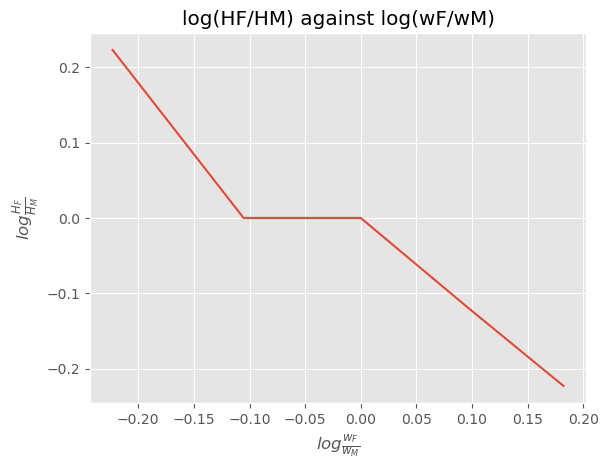

In [5]:
model.par.wF_vec = np.array([0.8, 0.9, 1.0, 1.1, 1.2])
log_HF_HM_list = []
log_wF_wM_list = []

for wF in model.par.wF_vec:
    model.par.wF = wF
    model.par.sigma = 1
    model.par.alpha = 0.5 
    opt = model.solve_discrete()
    log_HF_HM_list.append(math.log(opt.HF_HM))
    log_wF_wM_list.append(math.log(wF / model.par.wM))

plt.plot(log_wF_wM_list, log_HF_HM_list)
plt.xlabel('$log\\frac{w_F}{w_M}$')
plt.ylabel('$log\\frac{H_F}{H_M}$')
plt.title('log(HF/HM) against log(wF/wM)')
plt.show()


From the ratio plotted against each other, we see a negative correlation between the change in wages from working in the market and work in the home. The figure shows that men and women allocate the same hours at home, when their wage is equal. 
When men earns less than women, the man spend more time at home production than the women, and vice versa.

The household's decision-making process regarding the allocation of time between market work and home production activities is not directly influenced by the wage rate, as the latter is considered exogenous in the model. Instead, the wage rate affects the household's overall consumption and production choices indirectly, by influencing the household's income.

An increase in the wage rate leads to a rise in the household's income from market work, which in turn can boost the consumption of market goods and home-produced goods. Furthermore, a higher wage rate can affect the household's decision on how to allocate time between market work and home production activities, as it increases the opportunity cost of time spent on home production relative to market work.

Therefore, the wage rate has effects on the household's overall consumption and production choices by affecting the household's income and the opportunity cost of time.

*****

## <a id='toc1_'></a>[Question 3](#toc0_)


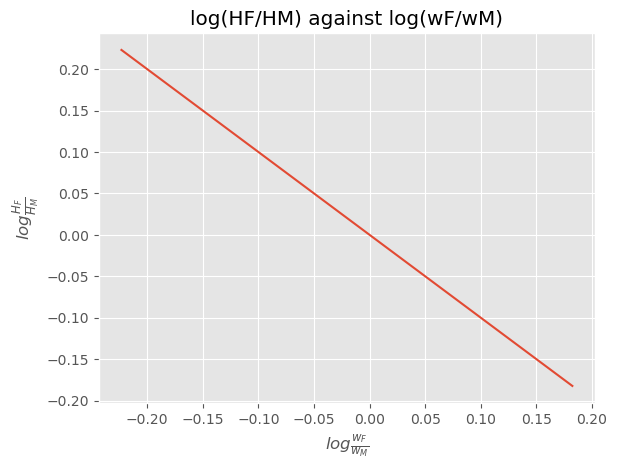

In [6]:
model.par.wF_vec = np.array([0.8, 0.9, 1.0, 1.1, 1.2])

log_HF_HM_list = []
log_wF_wM_list = []

model.sol.HM_vec = []
model.sol.HF_vec = []

for wF in model.par.wF_vec:
    model.par.wF = wF
    model.par.sigma = 1
    model.par.alpha = 0.5
    opt = model.solve()
    log_HF_HM_list.append(opt[2].log_HF_HM2)
    log_wF_wM_list.append(opt[2].log_wF_wM2)
    model.sol.HM_vec.append(opt[2].HM_best)
    model.sol.HF_vec.append(opt[2].HF_best)

plt.plot(log_wF_wM_list, log_HF_HM_list)
plt.xlabel('$log\\frac{w_F}{w_M}$')
plt.ylabel('$log\\frac{H_F}{H_M}$')
plt.title('log(HF/HM) against log(wF/wM)')
plt.show()



The HF/HM ratio has a constant slope, which shows the same picture as the previous with approximately the same slope. The HF/HM ratio decreases less than compared to the previous figure, which is due to function being continous in this model. Overall the picture is still the same, women work less in the home when they earn more, and spend less time at home production when their wage decreases. 


In [7]:
model.solve()
model.sol.HF_vec

[5.115716665422804,
 4.745635859698362,
 4.454475907685725,
 4.219942068861928,
 4.0271937155941675]

*****

## <a id='toc1_'></a>[Question 4](#toc0_)

The code below solves for alpha and sigma to minimize (β0-β0\hat)^2+(β1-β1\hat)^2, and illustrates how well it fits the data from the research paper.

In [8]:

model.run_regression()
model.estimate()

c:\Users\mads0\Downloads\HouseholdSpecializationModel.py:63: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\mads0\Downloads\HouseholdSpecializationModel.py:63: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


(0.9820154274442509, 0.10000004394816811)

 beta0 = 0.4000, beta1 = -0.1000, deviation = 0.0000, alpha = 0.9820, sigma = 0.1000


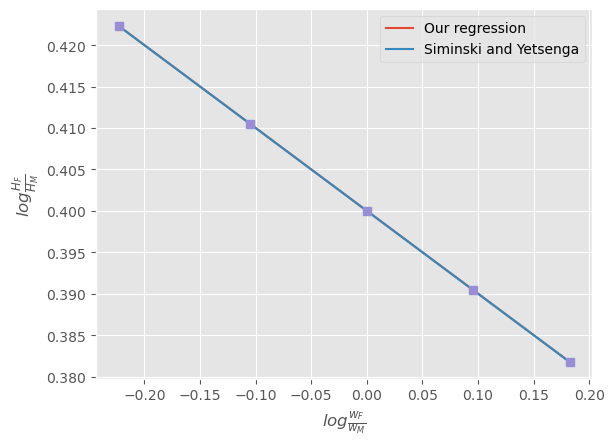

In [9]:
log_HF_HM = np.log(np.array(model.sol.HF_vec) / np.array(model.sol.HM_vec))

log_wratio = np.log(model.par.wF_vec/model.par.wM)

beta0_hat = model.sol.beta0
beta1_hat = model.sol.beta1
print(f' beta0 = {model.sol.beta0:.4f}, beta1 = {model.sol.beta1:.4f}, deviation = {((model.par.beta0_target-model.sol.beta0)**2+(model.par.beta1_target- model.sol.beta1)**2):.4f}, alpha = {model.par.alpha:.4f}, sigma = {model.par.sigma:.4f}')

# Predicting home work ratio for model 2 & 3 for female wage
est_model = beta0_hat + beta1_hat*np.log(model.par.wF_vec/model.par.wM)
est_data = model.par.beta0_target + model.par.beta1_target*np.log(model.par.wF_vec/model.par.wM)

# Siminski and Yetsenga's regression line
syr=0.4+(-0.1)*log_wratio


fig = plt.plot(log_wratio, log_HF_HM )
plt.plot(log_wratio, syr)
plt.xlabel('$log\\frac{w_F}{w_M}$')
plt.ylabel('$log\\frac{H_F}{H_M}$')
plt.plot(log_wratio, syr, 's')
plt.legend(['Our regression', 'Siminski and Yetsenga'])
plt.show()

From the figure, we get the following alpha and sigma values that minimze the errors:

alpha = 0.982 
sigma = 0.1 

- The figure shows that our regression with the values above fits almost perfectly with the data from  Siminiski and Yesenga's research paper.

From former question with saw that when **$\alpha$ = 0.5** men and women are equally productive at home labor. With **$\alpha$ = 0.982** women are more productive in home labor than men, which is dabateable, and we will look at this in the next question. The **$\sigma$ = 0.1** implies that when substituion wihtin the household is limited. When the relative wage rate between men and women increases by 1%, the relative hours in home production will increase by 0.1%. Hence, when women earn relative more than men, they will still relative spend more time at home production relative to the wage increase due to the low substition effect.    

*****

## <a id='toc1_'></a>[Question 5](#toc0_)


From question 4) we saw that our model only matched Seminski and Yetsenga when $\alpha$ = 0.982 despite empirical evidence suggest male and female productivity in home labor is equal, hence: where $\alpha$ = 0.5

Running the regression with $\alpha$ fixed at 0.5 we get the following results:

In [10]:
# Model estimate for sigma
# Parms
model.par.alpha = 0.5
model.par.sigma = 1
model.par.wF = 1
# For estimate_sigma_theta:
model.par.theta = 0

# Estimator for sigma
model.estimate_sigma()

beta0_hat_sigma = model.sol.beta0
beta1_hat_sigma = model.sol.beta1
print(f' beta0 = {model.sol.beta0:.4f}, beta1 = {model.sol.beta1:.4f}, deviation = {((model.par.beta0_target-model.sol.beta0)**2+(model.par.beta1_target- model.sol.beta1)**2):.4f}, alpha = {model.par.alpha:.4f}, sigma = {model.par.sigma:.4f}')

 beta0 = 0.0000, beta1 = -0.1004, deviation = 0.1600, alpha = 0.5000, sigma = 0.1004


From this regression we see that the intercept is at 0 where men and women receives the same market wage. In spite of men and women getting the same market wage, women still spend more time at home production. We will try to incorporate this with our extended model. We will try to take gender-roles and norms into account by adding a parameter $\theta$ which yields lower disutility for women relative to men in their home production. 
We will run this extended model and try to find the values for $\sigma$ and $\theta$ that fits the results from Seminski and Yetsenga.

In [11]:
# Model estimate sigma, theta
# Parms
model.par.alpha = 0.5
model.par.sigma = 1
model.par.wF = 1
model.par.theta = 0

# Estimator for sigma and theta
model.estimate_sigma_theta()

beta0_hat_sigma_theta = model.sol.beta0
beta1_hat_sigma_theta = model.sol.beta1
print(f' beta0 = {model.sol.beta0:.4f}, beta1 = {model.sol.beta1:.4f}, deviation = {((model.par.beta0_target-model.sol.beta0)**2+(model.par.beta1_target- model.sol.beta1)**2):.4f}, alpha = {model.par.alpha:.4f}, sigma = {model.par.sigma:.4f}, , theta = {model.par.theta:.4f}')

 beta0 = 0.4000, beta1 = -0.0887, deviation = 0.0001, alpha = 0.5000, sigma = 1.0000, , theta = 1.9125


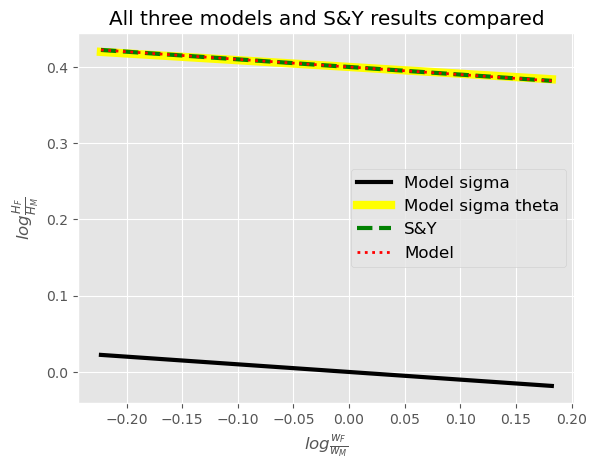

In [12]:
# Predicting home work ratio for model 2 & 3 for female wage
est_sigma = beta0_hat_sigma + beta1_hat_sigma*np.log(model.par.wF_vec/model.par.wM)
est_sigma_theta = beta0_hat_sigma_theta + beta1_hat_sigma_theta*np.log(model.par.wF_vec/model.par.wM)


# Plotting work ratio against the wage ratio
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('All three models and S&Y results compared')
ax.set_xlabel('$log\\frac{w_F}{w_M}$')
ax.set_ylabel('$log\\frac{H_F}{H_M}$')
ax.plot(np.log(model.par.wF_vec), est_sigma, label = 'Model sigma', color= 'black', linestyle = '-', linewidth = 3)
ax.plot(np.log(model.par.wF_vec), est_sigma_theta, label = 'Model sigma theta', color = 'yellow', linewidth = 6)
ax.plot(np.log(model.par.wF_vec), est_data, label = 'S&Y', color = 'green', linestyle ='--', alpha= 1, linewidth = 3)
ax.plot(np.log(model.par.wF_vec), est_model, label = 'Model', color = 'red', linestyle = ':', alpha=1, linewidth = 2)
ax.legend(prop={'size': 12})
plt.show()


From the results we notice that our extended model has not changed the substituability between men and women at home production significantly. At the same time we notice from the plot that our model is able to match the data from Yetsenga and Seminski with a theta value by 1.91. representing that women experience disutilty at 1.91 out of 2 hours spend at home production, we would expect the result to be the other way around. Hence we might have made a mistake in this last part of the inaugural project. 